# CHEM492/CHBE494/CHBE594: Linear Regression and Gradient Descent

# Linear Regression from Scratch and Using Scikit-learn

Here is a Python class that implements linear regression using Gradient descent from scratch. See the lecture slides for explicit comments on each line's functionality.

In [ ]:
class LinearRegressionGD_SV(object):

  def __init__(self, eta=0.001, n_iter=20):
    self.eta = eta
    self.n_iter = n_iter

  def fit(self, X, y):
    self.w_ = np.zeros(1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      output = self.net_input(X)
      errors = (y-output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, X):
      return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
      return self.net_input(X)

Intercept (w0): 5.132005931329785e-16
Coefficient (w1): 0.3547258757602515


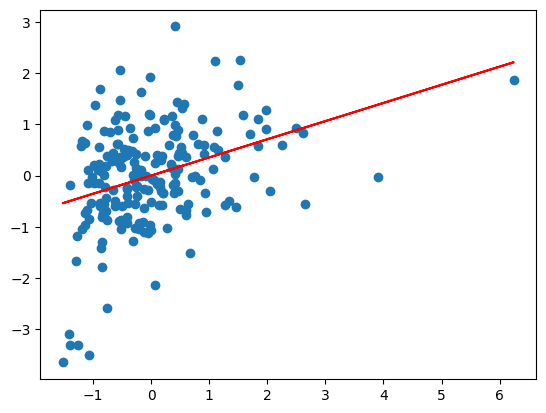

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

dataset_name = "Tm_200_subset_original.csv"
df = pd.read_csv(dataset_name) #read dataset into dataframe
X = np.array(df[['quadrupole']].values) #extract arrays for the quantities of interest
y = np.array(df[['Tm']].values)
sc_x = StandardScaler() #define the standard scaler to standardie the x and y features
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X) #fit the scalers and transform them according to the standard scaler
y_std = sc_y.fit_transform(y).flatten()
lr = LinearRegressionGD_SV() #Define the linear regression model using the class at the beginning of the notebook
lr.fit(X_std, y_std) #fit the linear regression model
# Print the coefficients
print(f'Intercept (w0): {lr.w_[0]}')
print(f'Coefficient (w1): {lr.w_[1]}')

# Plot the data points
plt.scatter(X_std, y_std, label='Data')

# Plot the fitted line
plt.plot(X_std, lr.predict(X_std), color='red', label='Linear Regression Fit')

Now, let's plot the fit error as a function of epoch as it was required within the Python class.

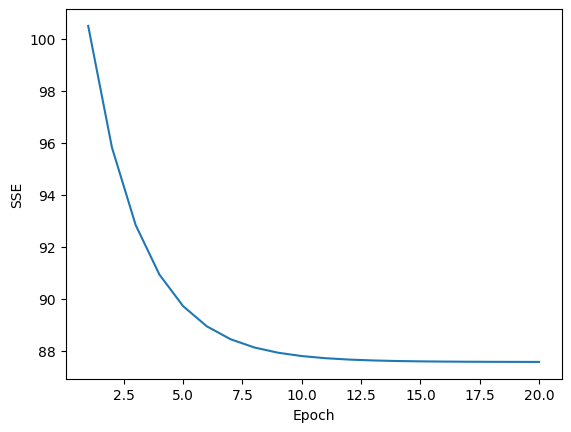

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, lr.n_iter+1), lr.cost_) #plot the cost function as a function of epoch
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

Finally, let's use the fitted linear model to make final predictions, and compute the errors of these predictions against their known values. #Important - Note that we have to use the inverse_transform method to rescale our output values since we scaled them during fitting!

In [ ]:
def lin_regplot(X, y, model):
  plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y.reshape(-1,1)), c='steelblue', edgecolor='white', s=70)
  plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform(model.predict(X).reshape(-1,1)), color='black', lw=2)
  return None

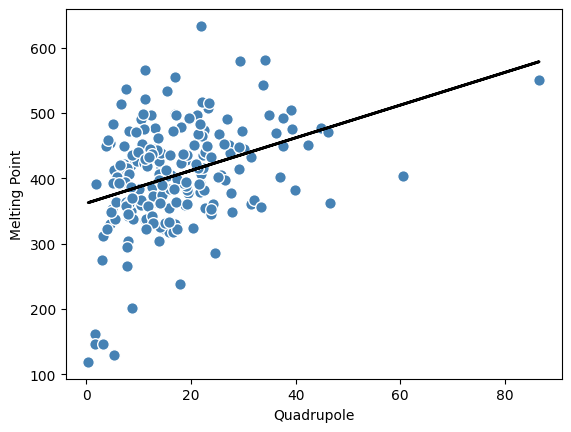

In [ ]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Quadrupole')
plt.ylabel('Melting Point')
plt.show()

Let's do the same thing now with the scikit-learn library - linear_model.LinearRegression()

Scikit-learn Intercept (w0): [5.15237952e-16]
Scikit-learn Coefficient (w1): [0.35875991]


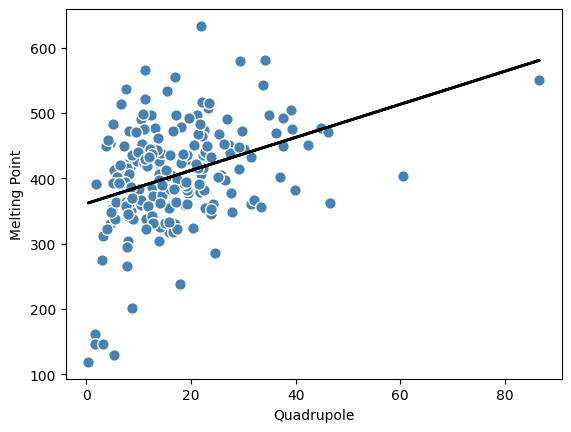

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
dataset_name = "Tm_200_subset_original.csv"
df = pd.read_csv(dataset_name)
X = np.array(df[['quadrupole']].values)
y = np.array(df[['Tm']].values)
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
lr = linear_model.LinearRegression() #Use the sklearn model
lr.fit(X_std, y_std)
# Print the coefficients
print(f'Scikit-learn Intercept (w0): {lr.intercept_}')
print(f'Scikit-learn Coefficient (w1): {lr.coef_[0]}')


lin_regplot(X_std, y_std, lr)
plt.xlabel('Quadrupole')
plt.ylabel('Melting Point')
plt.show()

Here's an extra little bonus: how to make a residual plot

In [ ]:
def lin_residual_plot(X, y, model):
  plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform((model.predict(X)-y).reshape(-1,1)), c='steelblue', edgecolor='white', s=70)
  plt.axhline(np.mean(sc_y.inverse_transform(y.reshape(-1,1))),c='k')
  plt.ylabel('Residual f(x)-y')
  return None


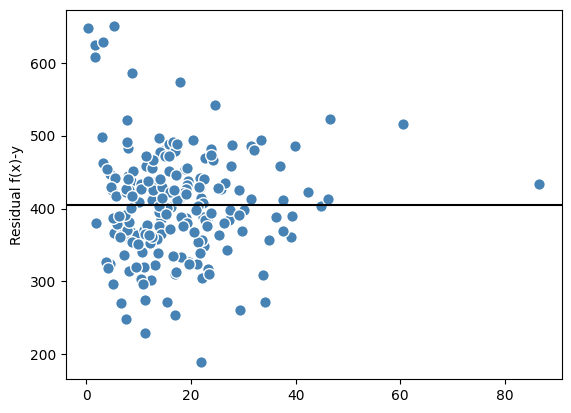

In [ ]:
lin_residual_plot(X_std,y_std, lr)